## Name: Susanna Wang, Steven Smith, Xinyan Chen

In [1]:
# install these package using Anaconda 
library(datasets)
library(caTools) 
library(party) 
library(dplyr) 
library(magrittr)
library(party)
library(caret)
library(rpart.plot)
library(corrplot)
library(rattle)
library(e1071)
library(GGally)
library(ggplot2)
library(randomForest)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Loading required package: rpart
corrplot 0.84 loaded
Warning message:
"package 'rattle' was built under R version 3.6.3"Loading required package: tibble
Warning message:
"package 'tibble' was built under R version 3.6.3"Loading required package: bito

In [2]:
# read csv and display 5 rows of dataset
credit <- read.csv("/Users/Xinyan Chen/Downloads/BankChurners.csv")
head(credit)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010,1247,2763,1.376,1088,24,0.846,0.311,5.5077e-05,0.99994


In [3]:
# remove last 2 columns of dataset since it is not useful for this project
credit <- credit[,-c(22:23)]
credit

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [4]:
# make attrition flag column as character
credit$Attrition_Flag <- as.character(credit$Attrition_Flag)

# rename existing customer as "Stay" and attrited customer as "Quit"
credit$Attrition_Flag[credit$Attrition_Flag=="Existing Customer"]<-"Stay"
credit$Attrition_Flag[credit$Attrition_Flag=="Attrited Customer"]<-"Quit"

# make attrition flag column as factor
credit$Attrition_Flag<-as.factor(credit$Attrition_Flag)

In [5]:
# train/validation split
sample_data = sample.split(credit, SplitRatio = 0.5) 

# train set
train_data <- subset(credit, sample_data == TRUE)

# testing set
test_data <- subset(credit, sample_data == FALSE) 

# Model 1: performing Decision Tree
model1 <- rpart(Attrition_Flag~ .,data=train_data, method = 'class', control = rpart.control(minsplit = 2, minbucket=1))

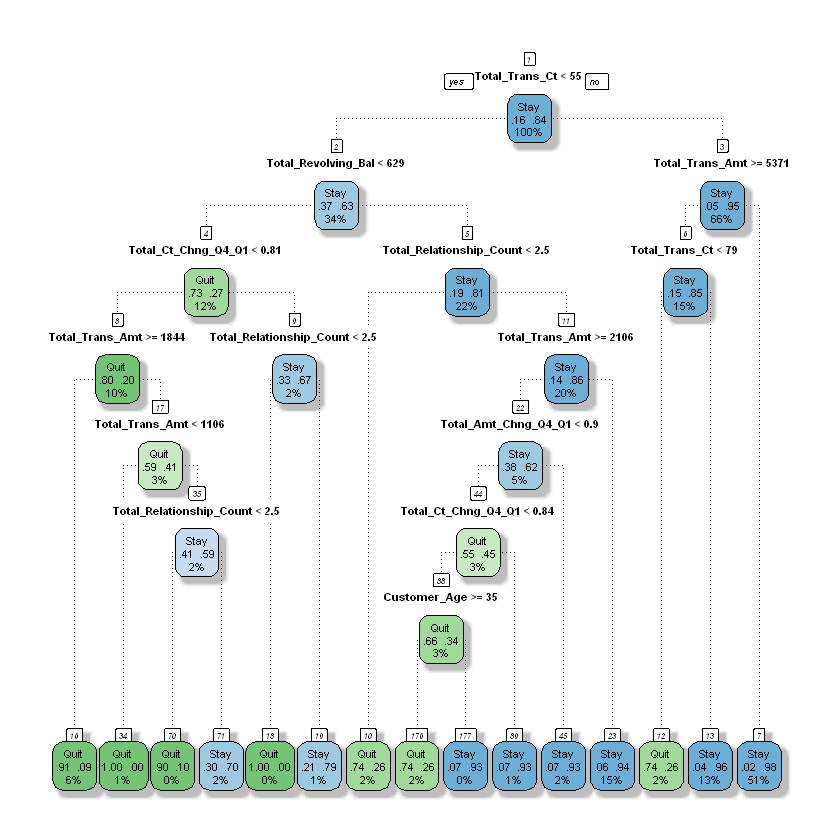

In [6]:
# display decision tree
rattle::fancyRpartPlot(model1, type = 1, sub = "")

In [7]:
# run prediction on test dataset
predict_model<-predict(model1, test_data,type = 'class')  

In [8]:
# print confusion matrix to check accuracy
confusionMatrix(predict_model,test_data$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction Quit Stay
      Quit  649  142
      Stay  211 4303
                                        
               Accuracy : 0.9335        
                 95% CI : (0.9264, 0.94)
    No Information Rate : 0.8379        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.7469        
                                        
 Mcnemar's Test P-Value : 0.0002954     
                                        
            Sensitivity : 0.7547        
            Specificity : 0.9681        
         Pos Pred Value : 0.8205        
         Neg Pred Value : 0.9533        
             Prevalence : 0.1621        
         Detection Rate : 0.1223        
   Detection Prevalence : 0.1491        
      Balanced Accuracy : 0.8614        
                                        
       'Positive' Class : Quit          
                                        

In [9]:
# specify control paraments for train
ctrl_specs <-trainControl(method = "cv",
                          savePredictions = "all",
                          number = 10,
                          classProbs = T)

# model 2: performing K folds logistic regression
model2<- train(Attrition_Flag~.,data = train_data,
              method="glm",
              family=binomial,
              trControl=ctrl_specs)


model2

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading

Generalized Linear Model 

4822 samples
  20 predictor
   2 classes: 'Quit', 'Stay' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4341, 4339, 4341, 4340, 4339, 4340, ... 
Resampling results:

  Accuracy   Kappa    
  0.9004577  0.5887954


In [10]:
# classify sample in out of bag dataset and displat confusion matrix
rf_classifier = randomForest(Attrition_Flag~., data=train_data, ntree=100, mtry=2, importance=TRUE)
rf_classifier


Call:
 randomForest(formula = Attrition_Flag ~ ., data = train_data,      ntree = 100, mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.41%
Confusion matrix:
     Quit Stay class.error
Quit  505  262  0.34159061
Stay   47 4008  0.01159063

In [11]:
# calculation of variable importance
varImp(rf_classifier)

,Quit,Stay
CLIENTNUM,-0.1453800,-0.1453800
Customer_Age,5.4899103,5.4899103
Gender,5.9574846,5.9574846
Dependent_count,1.4014470,1.4014470
Education_Level,0.7084798,0.7084798
Marital_Status,2.3105884,2.3105884
Income_Category,3.3118147,3.3118147
Card_Category,-0.1280120,-0.1280120
Months_on_book,3.0639551,3.0639551
Total_Relationship_Count,11.6972023,11.6972023


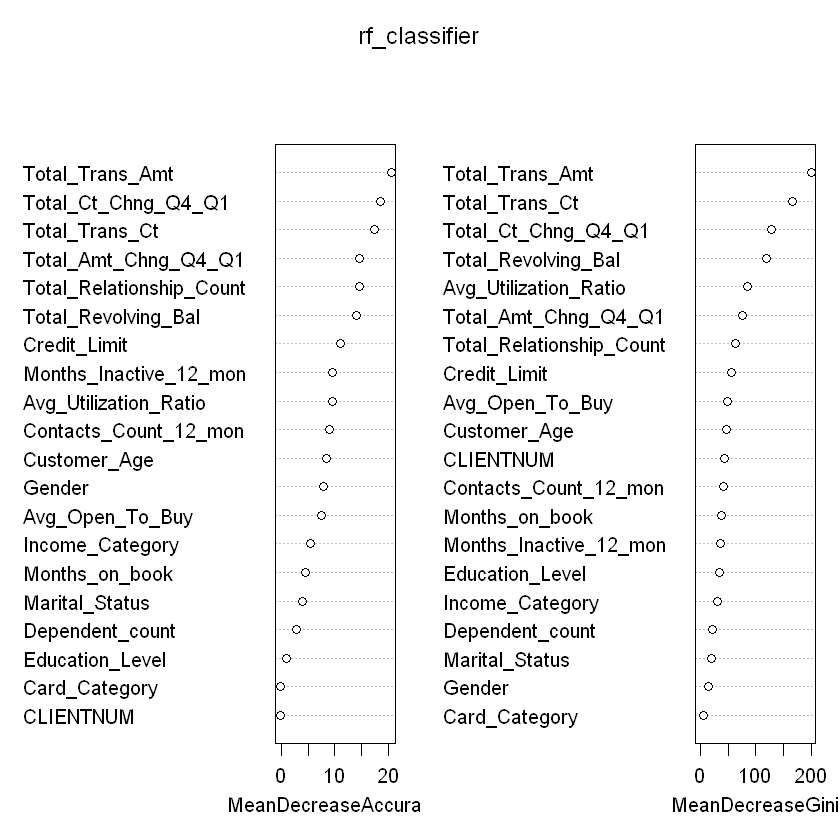

In [12]:
#variable importance plot
varImpPlot(rf_classifier)

In [13]:
# specify control paraments for train
control <- trainControl(method = "cv", # cross-validation
                        number = 10,
                        verboseIter = TRUE,
                        savePredictions = "final",
                        classProbs = TRUE) 

# model 3: performing random forest
model3 <- train(Attrition_Flag~., data = train_data,
               trControl = control,
               maximize = TRUE,
               tuneGrid = data.frame(mtry = 4),
               method = "rf")

+ Fold01: mtry=4 
- Fold01: mtry=4 
+ Fold02: mtry=4 
- Fold02: mtry=4 
+ Fold03: mtry=4 
- Fold03: mtry=4 
+ Fold04: mtry=4 
- Fold04: mtry=4 
+ Fold05: mtry=4 
- Fold05: mtry=4 
+ Fold06: mtry=4 
- Fold06: mtry=4 
+ Fold07: mtry=4 
- Fold07: mtry=4 
+ Fold08: mtry=4 
- Fold08: mtry=4 
+ Fold09: mtry=4 
- Fold09: mtry=4 
+ Fold10: mtry=4 
- Fold10: mtry=4 
Aggregating results
Fitting final model on full training set


In [14]:
# display model
model3

Random Forest 

4822 samples
  20 predictor
   2 classes: 'Quit', 'Stay' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4339, 4341, 4339, 4340, 4340, 4340, ... 
Resampling results:

  Accuracy   Kappa    
  0.9425477  0.7608463

Tuning parameter 'mtry' was held constant at a value of 4

In [15]:
# Print the confusion matrix to check the accuracy for training model
confusionMatrix.train(model3)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction Quit Stay
      Quit 11.1  1.0
      Stay  4.8 83.1
                            
 Accuracy (average) : 0.9426


In [16]:
# run predicion on test dataset
val_preds <- predict(model3, test_data)

In [17]:
# Print the confusion matrix to check the accuracy for predition
confusionMatrix(val_preds, test_data$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction Quit Stay
      Quit  600   52
      Stay  260 4393
                                          
               Accuracy : 0.9412          
                 95% CI : (0.9345, 0.9474)
    No Information Rate : 0.8379          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7601          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6977          
            Specificity : 0.9883          
         Pos Pred Value : 0.9202          
         Neg Pred Value : 0.9441          
             Prevalence : 0.1621          
         Detection Rate : 0.1131          
   Detection Prevalence : 0.1229          
      Balanced Accuracy : 0.8430          
                                          
       'Positive' Class : Quit            
                        